# Series Finder  

## Find ordered samples based on real-valued variables in the metadata

__1. Search for ordered samples__  

Enter your search parameters and create the set of ordered samples.

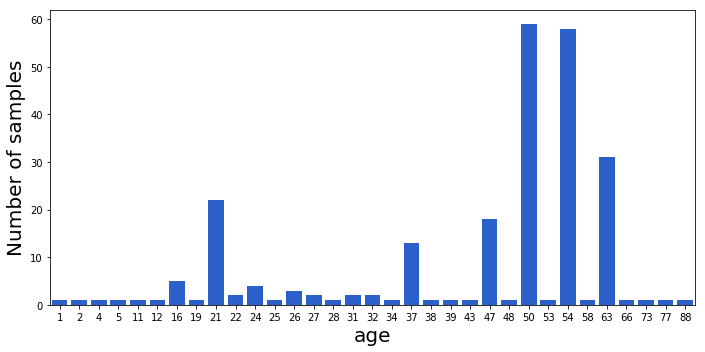

In [20]:
# Please enter a target term in place of 'brain'.  

TARGET_TERM = 'brain'                  ## <-- INPUT HERE


# Please enter your target property  in place of 'age'. Other
# example properties include 'passage number' and 'time',

TARGET_PROPERTY = 'age'                         ## <-- INPUT HERE


# Please enter your target unit in place of None. (Note: most 
# samples in the SRA do not have unit information. If the search 
# does not return many results, we suggest leaving this as None 
# as the metadata  is poorly labelled for units. Example units
# include 'hour', 'day', 'count unit'. For a full set of units
# see the Units Ontology, which can be queries via the Ontology
# Lookup Service: https://www.ebi.ac.uk/ols/index.

TARGET_UNIT = 'year'                            ## <-- INPUT HERE


# If True, remove diseased samples from the results. 

FILTER_DISEASE = True                           ## <-- INPUT HERE


# If True, remove cell lines samples from the results. 

FILTER_CELL_LINE = False                        ## <-- INPUT HERE


# If True, remove samples that have been differentiated in vitro
# from the results.

FILTER_IN_VITRO_DIFFERENTIATED_CELLS = True     ## <-- INPUT HERE 


# If your longitudinal query is a temporal property targeting 
# in vitro differentiating cells, then set this to True. Note, 
# this requires also setting FILTER_IN_VITRO_DIFFERENTIATED_CELLS
# to False.

ONLY_IN_VITRO_DIFFERENTIATED_CELLS = False


# Enter the name of the tab-separated value file where all results
# will be written.

SAVE_FILE = 'brain_by_age.tsv'                  ## <-- INPUT HERE


# Enter the name of the file in which to save the bar graph figure
# summarizing the results.

SAVE_FIGURE = 'brain_series.png'                ## <-- INPUT HERE



#################### Create series and plot figures ################
import json
import pandas as pd
from utils import *
r = load_metadata(None)
sample_to_all_terms = r[0]
sample_to_ms_terms = r[1]
term_name_to_id = r[2]
term_id_to_name = r[3]
sample_to_type = r[4]
sample_to_study = r[5]
sample_to_runs = r[6]
sample_to_real_val = r[7]

val_to_samples, primary_df = series(
    TARGET_TERM, 
    TARGET_PROPERTY, 
    sample_to_real_val, 
    sample_to_ms_terms,             
    sample_to_type, 
    sample_to_study, 
    term_name_to_id,
    term_id_to_name,
    filter_disease=FILTER_DISEASE, 
    filter_poor=True, 
    filter_cell_line=FILTER_CELL_LINE, 
    filter_differentiated=FILTER_IN_VITRO_DIFFERENTIATED_CELLS,
    value_limit=100, 
    target_unit=TARGET_UNIT
)
if len(val_to_samples) > 0:
    create_series_plots(val_to_samples, TARGET_PROPERTY)
    if SAVE_FIGURE is not None:
        plt.savefig(SAVE_FIGURE, format='png', dpi=150)
    plt.show()

    # Write output
    primary_df.to_csv(SAVE_FILE, sep='\t')
else:
    print('\x1b[31mNo samples were returned by this query. Please refine your query and try again.\x1b[31m')

__2. Browse other metadata terms that are associated with samples in a given time point__

Enter whether you want to view cases or controls. Assign the following variable to the number corresponding to the timepoint you would like to view:

Displaying data for 31 sample with property=63


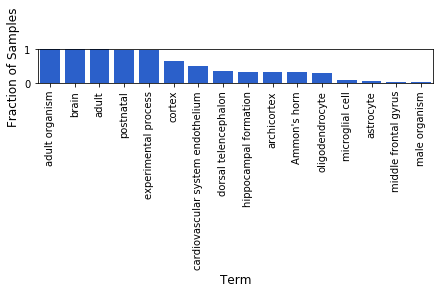

Displaying most frequent co-occuring terms for 31 sample with property = 63


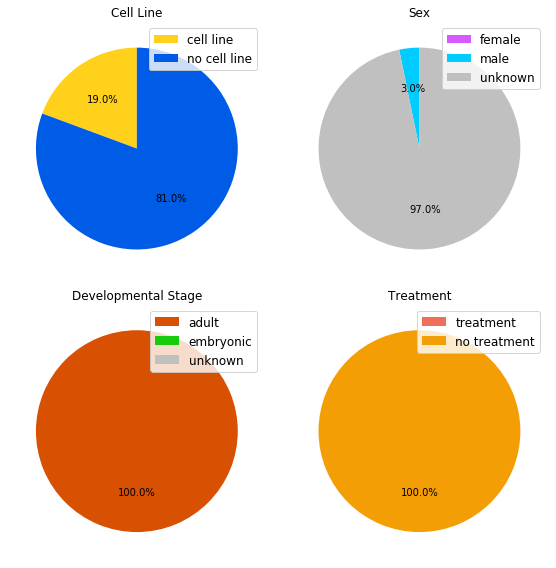

In [27]:
VALUE = 63                                     ## <-- INPUT HERE

SAVE_BAR_FIGURE = 'brain_series_co_terms.png'  ## <-- INPUT HERE

SAVE_PIE_FIGURE = 'brain_series_pie.png'       ## <-- INPUT HERE


err_msg = create_barplot_most_common_coterms_series(val_to_samples, VALUE, sample_to_ms_terms)
if err_msg is None:
    if SAVE_BAR_FIGURE is not None:
        plt.tight_layout()
        plt.savefig(SAVE_BAR_FIGURE, format='png', bbox_inches='tight', dpi=150)
    plt.show()
    create_pie_charts_series(primary_df, val_to_samples, VALUE, sample_to_ms_terms)
    if SAVE_PIE_FIGURE is not None:
        plt.savefig(SAVE_PIE_FIGURE, format='png', dpi=150)
    plt.show()
else:
    print('\x1b[31m{}\x1b[31m'.format(err_msg))